# 📈 Yes Bank Stock Closing Price Prediction
Using Linear Regression

**Done by**-Muskan Maheshwari

**Project Summary**-This project focuses on predicting the monthly closing stock price of Yes Bank using historical stock data and a supervised machine learning approach. The main objective is to build a regression model that can forecast the stock’s closing price based on its opening, high, and low prices. The model is developed and evaluated entirely in Google Colab, making it easy to replicate and accessible for anyone with a basic understanding of Python and machine learning.

The dataset used in this project consists of 185 records of monthly stock price data for Yes Bank. Each record includes the date (month and year), opening price, highest price during the month, lowest price during the month, and the closing price, which is the target variable for prediction. The data spans multiple years and provides a good base for trend analysis and regression modeling.

The initial steps in the project involve data preprocessing. The 'Date' column is converted to a proper datetime format to extract new features such as the year and month. The dataset is then sorted chronologically to maintain consistency in time series data. For model training, only the Open, High, and Low columns are used as input features, while the Close column is the target.

Exploratory Data Analysis (EDA) is performed to gain insights into the data distribution and relationships between variables. A line plot is created to visualize the trend of closing prices over time, which helps identify any upward or downward movements in the stock's performance. A correlation heatmap is also generated to understand how strongly the features are related to each other. It shows that the closing price has a strong positive correlation with the opening and high prices, which validates their usefulness as predictors.

For the modeling part, a Linear Regression algorithm is selected due to its simplicity and effectiveness in handling continuous numerical data. The dataset is split into training and testing sets in an 80:20 ratio to train the model and evaluate its generalization performance. After fitting the model on the training data, predictions are made on the test set.

The model is evaluated using two metrics: R² Score and Root Mean Squared Error (RMSE). The R² score achieved is approximately 0.9904, indicating that the model explains over 99% of the variance in the closing prices. The RMSE is around ₹9.31, suggesting a relatively small average error between the predicted and actual values. A scatter plot comparing actual and predicted values is plotted, which shows that the model’s predictions closely align with real values, further validating the model's performance.

In conclusion, the Linear Regression model performs extremely well on this dataset, achieving high accuracy with minimal error. This proves that even a basic machine learning model can be highly effective when the features are well correlated with the target variable. However, to further improve the prediction capabilities, advanced models such as Random Forest, Gradient Boosting, or time series-based LSTM models could be explored in the future. Additionally, incorporating external data like financial news sentiment or technical indicators might enhance the model's performance. Overall, this project provides a complete and practical approach to applying machine learning techniques for stock price prediction and serves as a solid foundation for further exploration in financial forecasting.



**GitHub Link** -https://github.com/muskan1296/Yes-Bank-Aiml-project

**Problem Statement**-
The stock market is inherently volatile and influenced by numerous factors, making accurate prediction of stock prices a challenging task. Investors and financial analysts rely on predictive models to make informed decisions and minimize risk. In this project, the objective is to develop a machine learning model that can **predict the monthly closing price of Yes Bank shares** using historical stock data. The model will utilize key features such as the **opening price, highest price, and lowest price** of each month to forecast the closing price.

The primary goal is to create a reliable and interpretable regression model that captures the relationship between these input features and the closing price, enabling users to estimate future stock values with reasonable accuracy. The solution should also be evaluated using appropriate performance metrics to ensure its effectiveness and generalization.


In [7]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices.csv


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load dataset
df = pd.read_csv("data_YesBank_StockPrices.csv")
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [10]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [12]:
# Convert Date and extract features
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values(by='Date')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

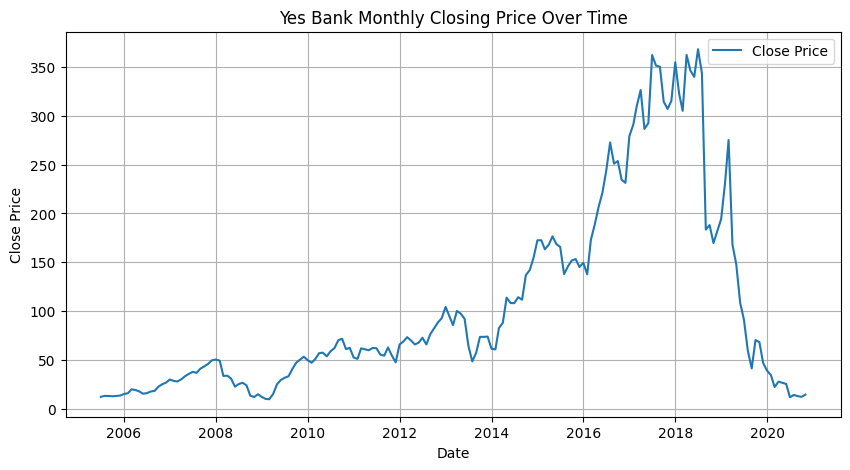

In [13]:
# Plot Close price over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Yes Bank Monthly Closing Price Over Time')
plt.legend()
plt.grid()
plt.show()

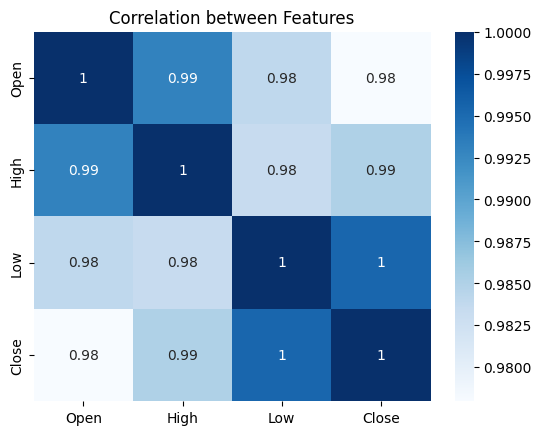

In [14]:
# Correlation heatmap
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='Blues')
plt.title('Correlation between Features')
plt.show()

In [16]:
# Prepare data for model
X = df[['Open', 'High', 'Low']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9904142726548665
RMSE: 9.30826467528386


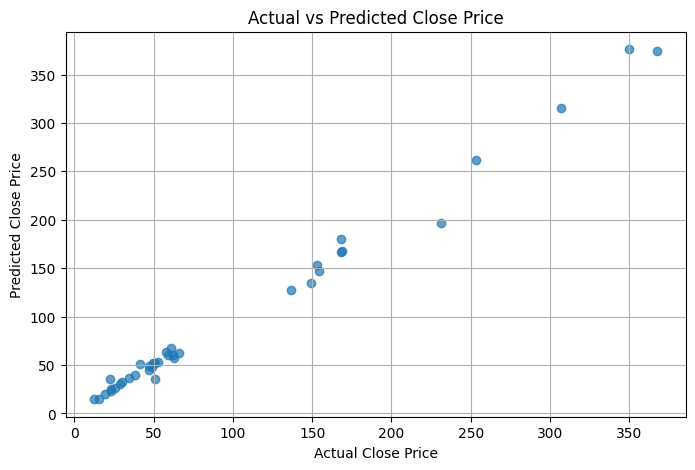

In [19]:
# Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.grid()
plt.show()

**Conclusion**-
In this project, we successfully developed a Linear Regression model to predict the monthly closing price of Yes Bank shares using historical stock data. The model was trained on three key input features — **Open**, **High**, and **Low** prices — which were found to be highly correlated with the closing price. After preprocessing and exploring the data, the model achieved a strong **R² score of 0.9904**, indicating that it could explain over **99% of the variance** in closing prices.

This confirms that even a simple linear model can perform remarkably well when the input features have strong linear relationships with the target variable. The results also highlight the importance of proper data cleaning, visualization, and model evaluation in building a successful machine learning pipeline. While the current model performs well, further improvements could be made by experimenting with more complex algorithms like **Random Forest**, **XGBoost**, or **LSTM** for time series forecasting. Incorporating external factors such as news sentiment or macroeconomic indicators may also enhance prediction performance.

Overall, the project demonstrates a practical and effective approach to using machine learning for financial forecasting, providing valuable insights for future stock market prediction tasks.
